In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Now we import our dataset

In [2]:
medical=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
medical

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
medical.shape[1]

7

In [4]:
medical.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
medical.shape[0]

1338

Here we can see that there the dataset is divided into two parts 
1) numerical:- age, bmi, children, charges 
2) categorical:- sex, smoker , region

In [6]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
medical.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
medical['charges'].value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

In [9]:
medical.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [10]:
medical['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [11]:
medical['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [12]:
medical.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

As we can see that there is no null values present in the dataset 

In [13]:
medical.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


 Herer we can see that age ,bmi,children, charges there is great difference between max and 75%so there maybe chnace of outliers present 

# Data visiualization

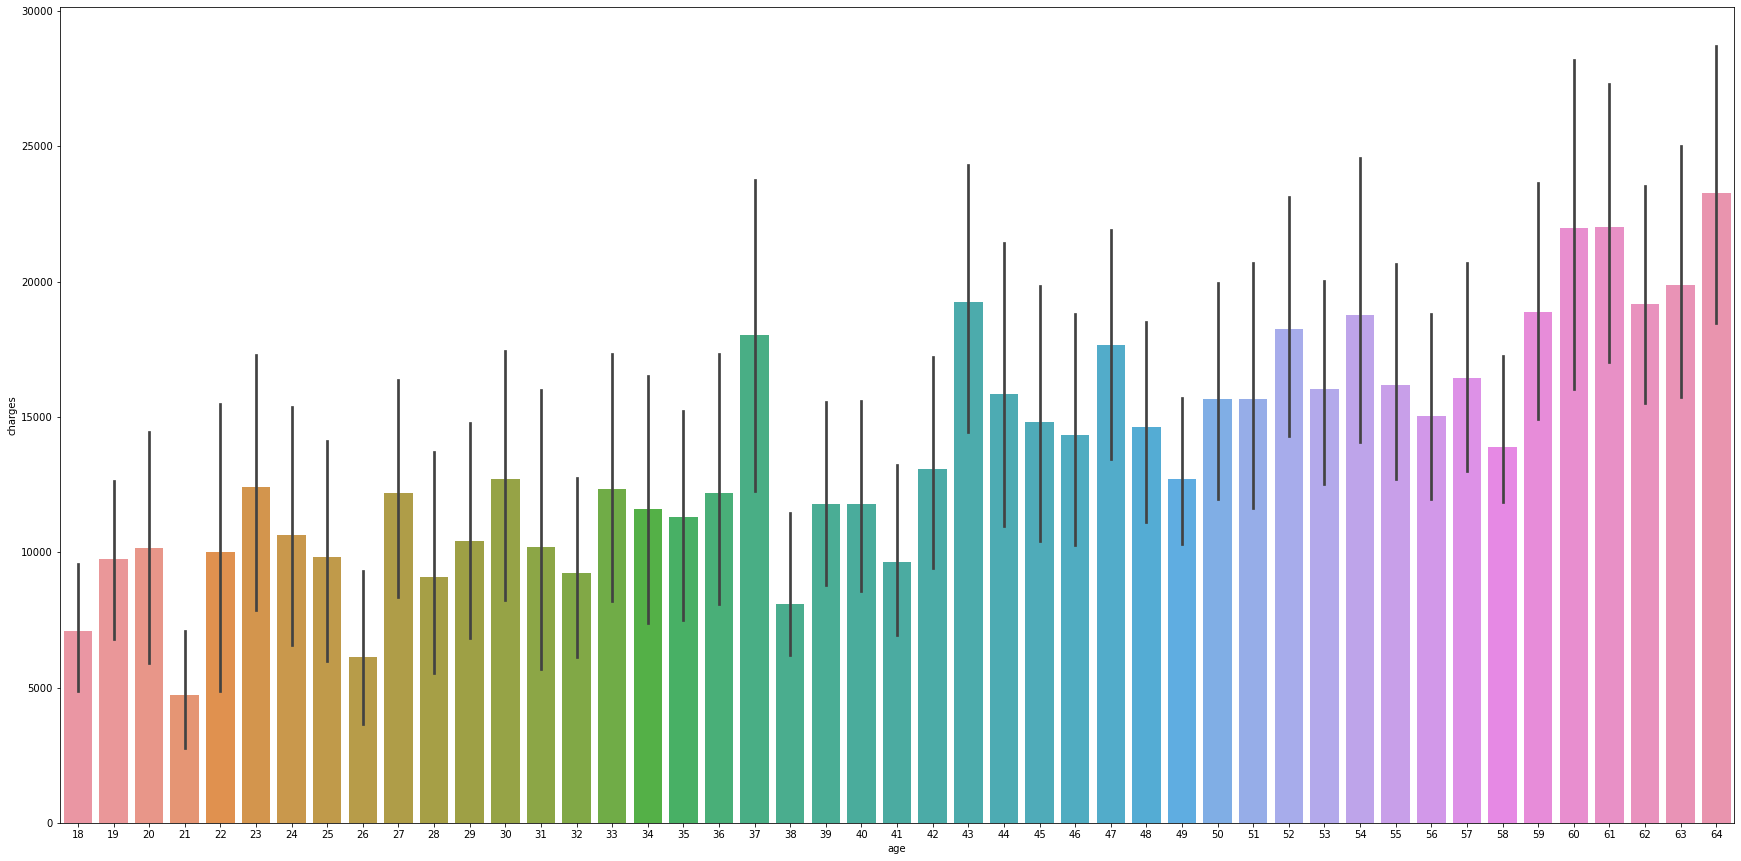

In [14]:
# let's see different relationship between the  features
plt.figure(figsize=(30,15))
sns.barplot(x='age',y='charges',data=medical)
plt.xlabel("age")
plt.ylabel("charges")
plt.show()

As we can see from above relationship that as age is increasing the charges also increasing 

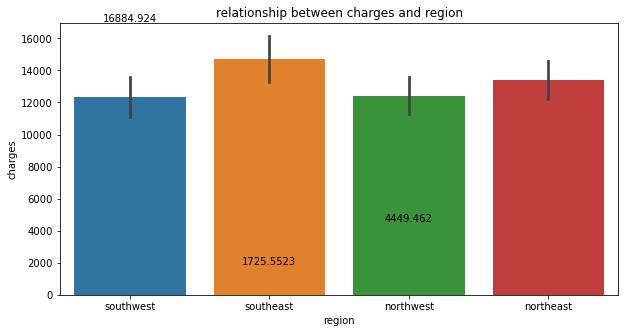

In [15]:
plt.figure(figsize=(10,5))
ax=sns.barplot(y=medical['charges'],x=medical['region'])
for i, v in enumerate(medical['charges']):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')

plt.title("relationship between charges and region")
plt.show()

As from above graph we can see that southeast have have more insurance than any othe region as well as northwest and southwest have least insurance

<AxesSubplot:xlabel='smoker', ylabel='charges'>

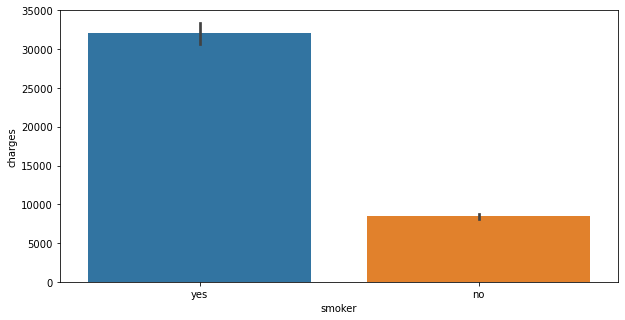

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(x=medical['smoker'],y=medical['charges'])

From this bar visulaization we can clearly see that the person who smoke have likely to get helth issue problem so due to that risk factor they consider to keep insurance and people whi don't smoke is ikely to have pay less charges because there chance to get fall ill also reduced...

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

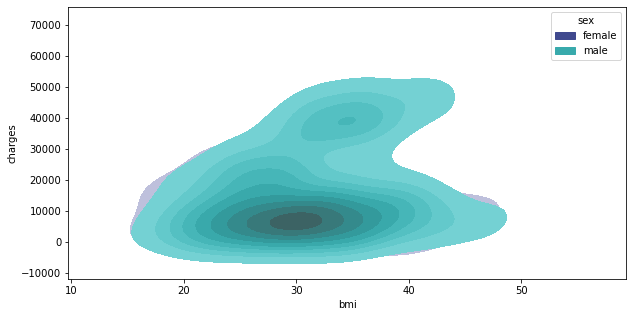

In [17]:
plt.figure(figsize=(10,5))
sns.kdeplot( x="bmi",y="charges", hue="sex", shade=True, palette="mako",data = medical)
plt

From the density we can clearly see that female wjo having ( 21 and 32) have more dense means some women have bmi high but they generally pay less for insurance charges as compared to men we can see men density is spred over wide range in bmi over "x -axis" under weight to extremly "overweight" (normal range for bmi is (18.5 to 25) ands therer more there chanv]ce of health also increases thats why they are having hogh crge insurance almost from 40000 to 60000

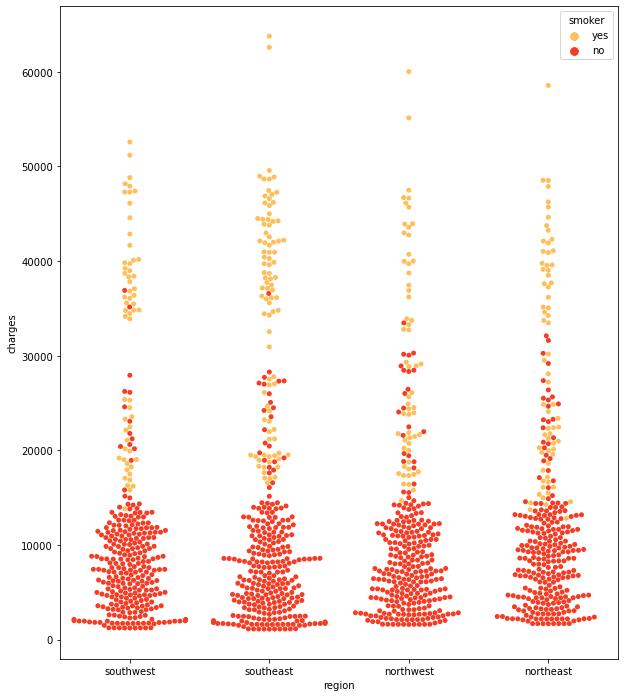

In [18]:
plt.figure(figsize=(10,12))
sns.swarmplot(x="region",y="charges",hue="smoker",data=medical,palette="YlOrRd")
plt.show()

As we can clearly see that from this plot a very good information coming out is that :-
1. As you can see almost in every regoin people who don't smoke have less insurance bill obviously there chance to get      
   unhealthy reduced so there insurance bill also less and very few poeple who donn;t smoke have insurance bill (between 20000      to 30000) 
2. Now but people who smoke higher in "southwest" and "southeast" ( so south region people smoke more that north region ) so
   as we can see from high smoker in every region mean more insurance bill ( between 20000 to 50000) 
   
   conclusion region more smoker have more insurance bill

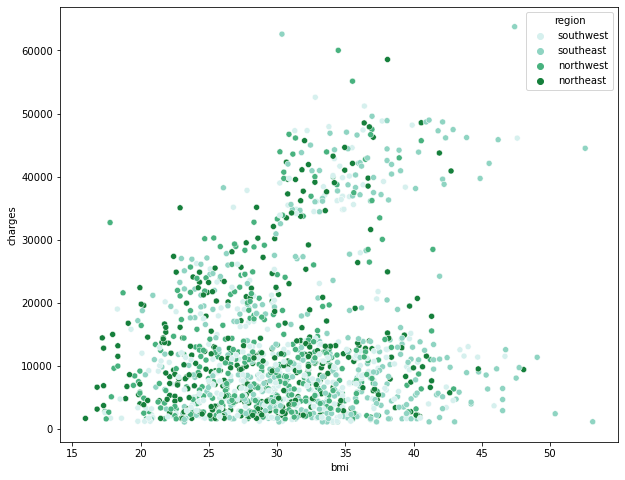

In [19]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="bmi",y="charges",hue='region',data=medical,palette="BuGn")
plt.show()

From here we can see popele who having healthy BMI index have less cost insurance whereas people who are having more bmi(underweight and overweight) having higher BMI as compoare to other  south east and south west have more unhealthy and high charges

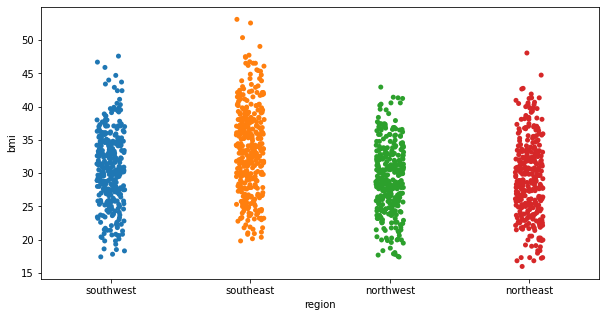

In [20]:
plt.figure(figsize=(10,5))
ax=sns.stripplot(y=medical['bmi'],x=medical['region'])

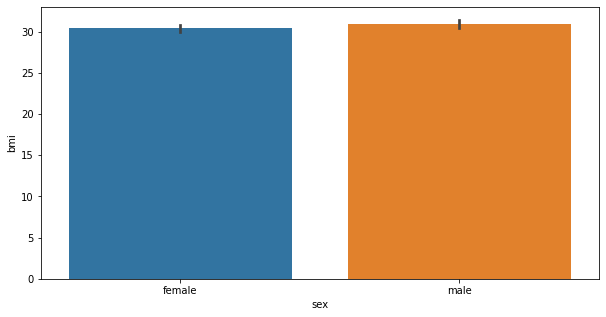

In [21]:
plt.figure(figsize=(10,5))
ax=sns.barplot(y=medical['bmi'],x=medical['sex'])

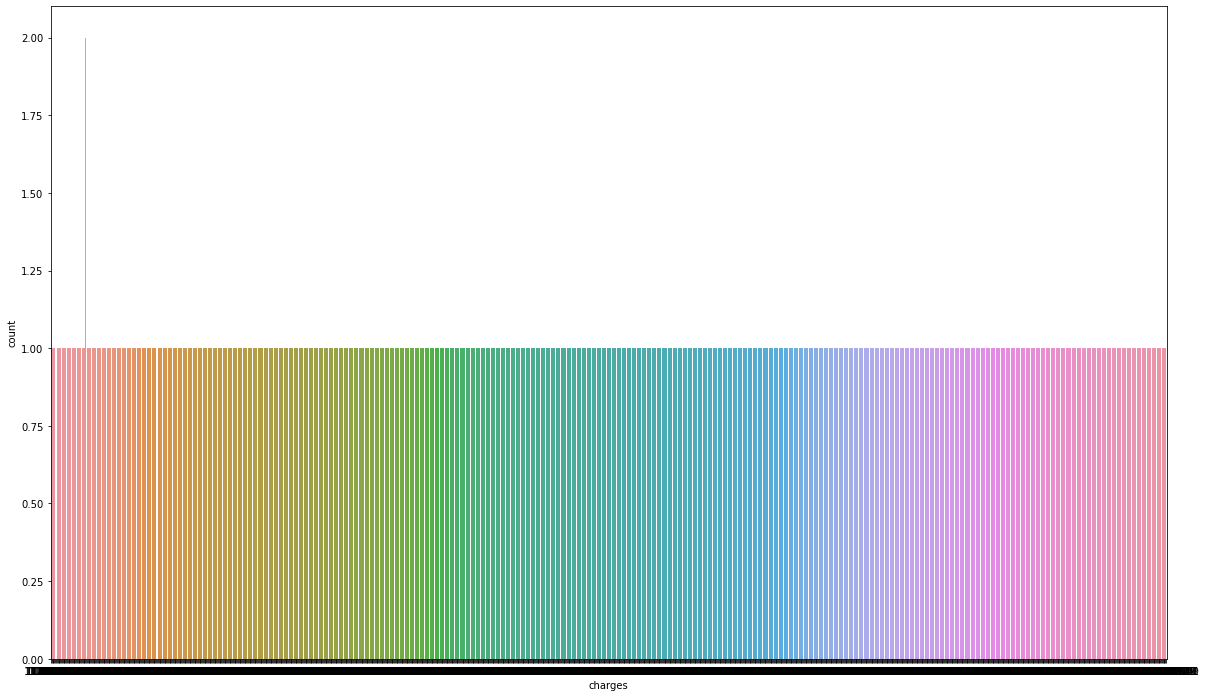

In [22]:
plt.figure(figsize=(20,12))
sns.countplot(x="charges",data=medical)
plt.show()

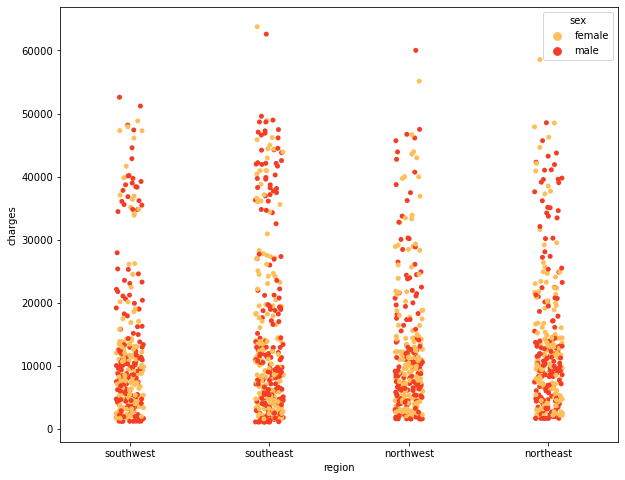

In [23]:
plt.figure(figsize=(10,8))
sns.stripplot(x="region",y="charges",hue="sex",data=medical,palette="YlOrRd")
plt.show()

As we can see from the graph in the southwest and southeast have more male paying higher insurance as compared to women 

<Figure size 720x576 with 0 Axes>

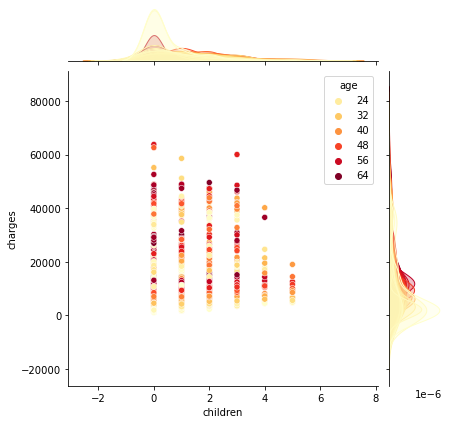

In [24]:
plt.figure(figsize=(10,8))
sns.jointplot(x="children",y="charges",hue="age",data=medical,palette="YlOrRd")
plt.show()

As from graph it is clear that people who have don't have any children is also paying very less insurance less than 20000 beacuse they hav no chuldren so no exttra insurance for them so no extra cost as you cxan see in very young age like 24 no children as teh age increases children uncreses so more insurance for them

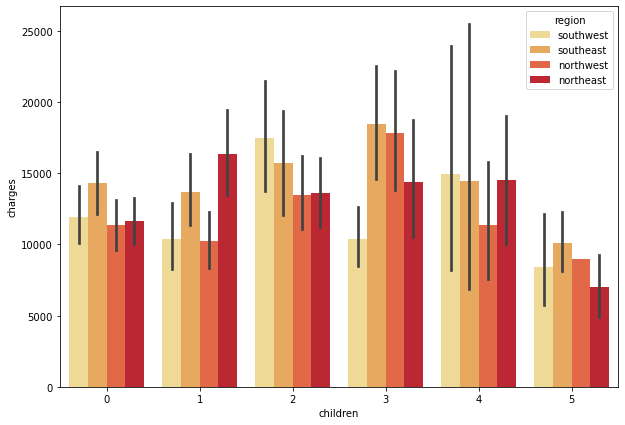

In [25]:
# lest's check which region have higher children
plt.figure(figsize=(10,7))
sns.barplot(x="children",y="charges",hue="region",data=medical,palette="YlOrRd")
plt.show()

As from this grapah it more clear that northwest who having 
1)0 children paying very less upto 12000 inmsurance 
2) 1 chiuldren northeast paying more insurance upto 16000
3) having 2 children southwest having more insurance upto 17000
4) having 3 children southeast paying more upto 18000 
5) having 4 children northwest paying less insurance uptyo 12000
6) having 5 children southeast paying more but 

but as we can see if the children increases upto 5 in all region the cost of insuerance decreses in downtrend because till three children mother or father pay for insurances but as children increses chance of insurance for all of them costlier to afford so we see in the graph also no of children increases the insurance cost comes vey low 

# NOW WE DO PRE PROCESSING OF OUR DATSET

FIRST WE SEE THERE IS CATEGORICAL COLUMN AND TO APLLY STANDARD SCALAR WE TO FISRT COVERT IT INTO A NUMERICAL COLUMN
 
Now we apply "Label encoder"  to ever categorical column becaue as you can see my target variable is numerical and my castegorical column has a relationship with my target varible so i will take mean or median of target variable and assign it to the each category



In [26]:
from sklearn.preprocessing import LabelEncoder
categorical_coulmns=['sex','smoker','region']
LE= LabelEncoder()
for column in categorical_coulmns:
    medical[column]=LE.fit_transform(medical[column])


In [27]:
medical

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


 As you can see that our categorical column (sex, smoker , region) all category are replaced by numerical column so now ew can use featuer selection

In [28]:
medical['region'].value_counts()

2    364
3    325
1    325
0    324
Name: region, dtype: int64

In [29]:
corr=medical.corr()
corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


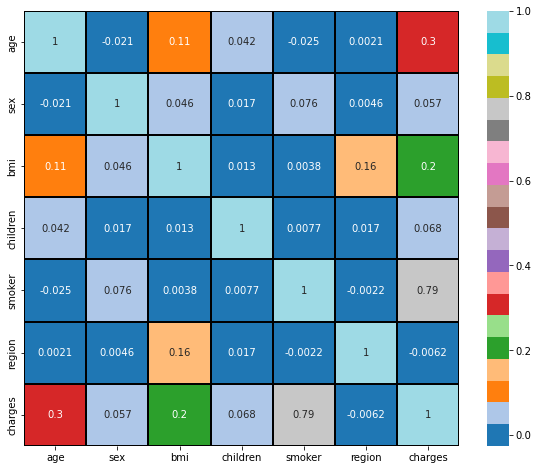

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,annot_kws={'size':10},linewidths=2,linecolor='black',square=True, cmap="tab20")
plt.show()

BMI, smoker , Age is having a very high coorelation with target

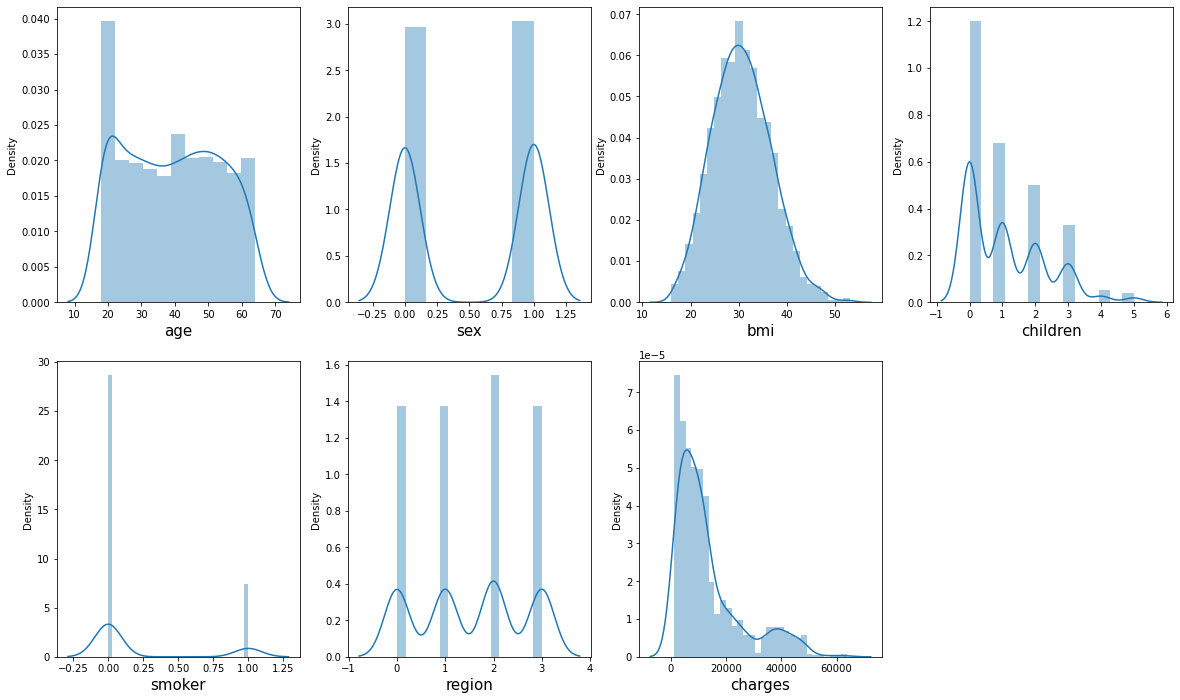

In [31]:
# now after apllying label encoder let's see how data is distributed 
plt.figure(figsize=(20,25))
column=1
for columns in medical:
    if column <=10:
        plt.subplot(4,4,column)
        ax=sns.distplot(medical[columns])
        plt.xlabel(columns,fontsize=15)
    column+=1
plt.show()

In [32]:
medical.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

As we can see from sctter plot that therre very littile skweness present in the all feture ootherwise it is almost bell shaped curve

In [33]:
# before plotting scatter plot let's seprate target and feature variable
x=medical.drop(columns=["charges"])
y=medical["charges"]

In [34]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


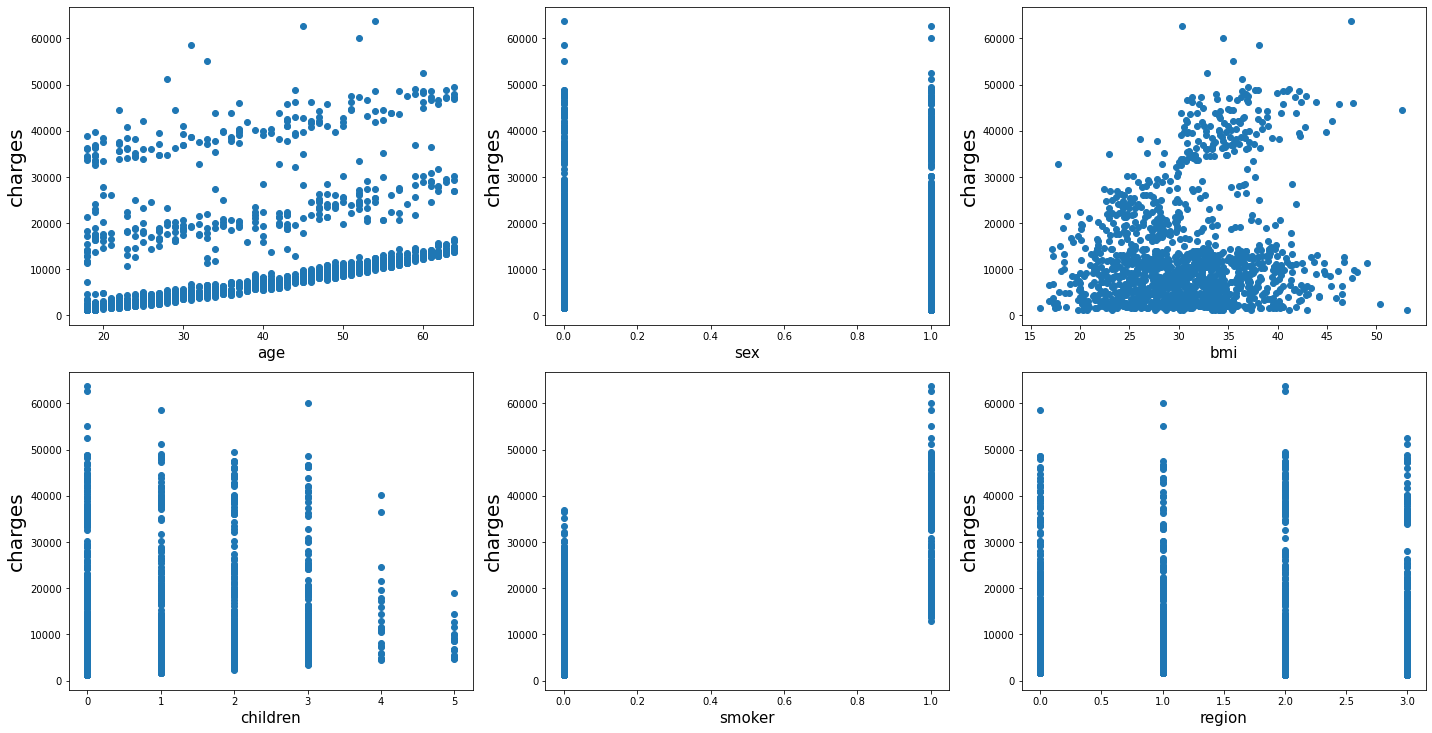

In [35]:
plt.figure(figsize=(20,25))
column=1
for columns in x:
    if column <=10:
        ax=plt.subplot(5,3,column)
        plt.scatter(x[columns],y)
        plt.xlabel(columns,fontsize=15)
        plt.ylabel("charges",fontsize=20)
    column+=1
plt.tight_layout()
plt.show()

As we can see that there is linear realtionship between target variable and feature variable

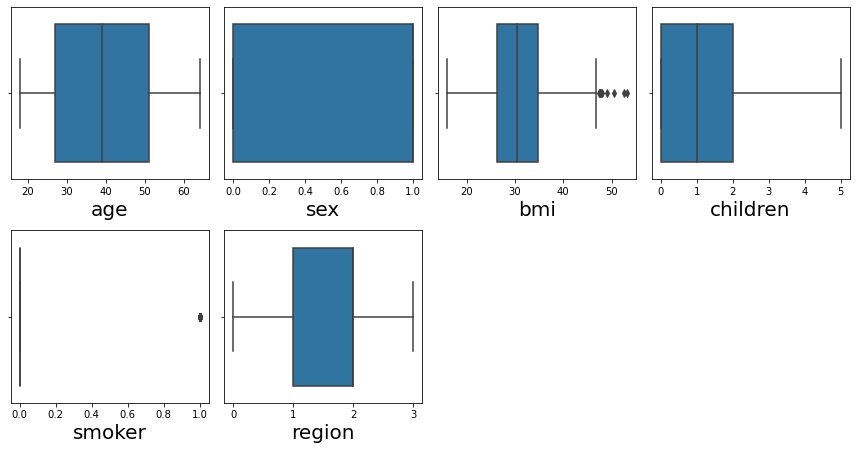

In [36]:
# lets's check outliers present in the dataset or not
plt.figure(figsize=(12,12))
feature=1
for i in x:
    if feature <=12:
        plt.subplot(4,4,feature)
        ax=sns.boxplot(x[i])
        plt.xlabel(i,fontsize=20)
    feature+=1
plt.tight_layout()

As we can see thorigh boxplot that BMI have some outliers present

# 

In [37]:
# let's check multicollinearrity with VIF but before that we have to scaled our data

In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled_values=scaler.fit_transform(x)
x_scaled_values

array([[-1.43876426, -1.0105187 , -0.45332   , -0.90861367,  1.97058663,
         1.34390459],
       [-1.50996545,  0.98959079,  0.5096211 , -0.07876719, -0.5074631 ,
         0.43849455],
       [-0.79795355,  0.98959079,  0.38330685,  1.58092576, -0.5074631 ,
         0.43849455],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , -0.90861367, -0.5074631 ,
         0.43849455],
       [-1.29636188, -1.0105187 , -0.79781341, -0.90861367, -0.5074631 ,
         1.34390459],
       [ 1.55168573, -1.0105187 , -0.26138796, -0.90861367,  1.97058663,
        -0.46691549]])

In [39]:
# now lets's check VIF values to find the mullticollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['VIF'] = [variance_inflation_factor(x_scaled_values, i) for i in range(x_scaled_values.shape[1])]
vif_data["faeture"]=x.columns

In [40]:
y_transformed=np.log(y)
y_transformed

0        9.734176
1        7.453302
2        8.400538
3        9.998092
4        8.260197
          ...    
1333     9.268661
1334     7.698927
1335     7.396233
1336     7.604867
1337    10.279914
Name: charges, Length: 1338, dtype: float64

In [41]:
print(vif_data)

        VIF   faeture
0  1.015394       age
1  1.008889       sex
2  1.040608       bmi
3  1.002482  children
4  1.006466    smoker
5  1.025966    region


As we can see all our VIf values are less than threshold 5 that we assume greater than 5 mullticolnearity but here we no mullitcollinearity

# Now we built our machine learning model

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

# Linear regression

In [43]:
def select_best_random_state(x_scaled_values, y):
    best_random_state =0
    best_r2_score =0

    for random_state in range(1,300):
        X_train, X_test, y_train, y_test = train_test_split(x_scaled_values, y, test_size=0.2, random_state=random_state)
        LR = LinearRegression()
        LR.fit(X_train, y_train)
        y_pred = LR.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state

    return best_random_state, best_r2_score


best_random_state, best_r2_score= select_best_random_state(x_scaled_values, y)
print("Best Random State  :", best_random_state)
print("Best r2_score:- ",best_r2_score*100)

Best Random State  : 215
Best r2_score:-  81.78420745999806


In [44]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled_values, y, test_size=0.2, random_state=215)
LR=LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
y_pred_train=LR.predict(X_train)
print("r2_score om training dataset",r2_score(y_train,y_pred_train)*100)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("men absolute eroor",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score om training dataset 73.06278759856393
mean_squared_error 30060453.99916537
men absolute eroor 4097.418614043558
mean_squared_error 5482.741467474585


# RandomForest Regression

In [45]:
def select_best_random_state(x_scaled_values, y):
    best_random_state =0
    best_r2_score =0

    for random_state in range(1,300):
        X_train, X_test, y_train, y_test = train_test_split(x_scaled_values, y, test_size=0.2, random_state=random_state)
        RFR=RandomForestRegressor()
        RFR.fit(X_train, y_train)
        y_pred = RFR.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state

    return best_random_state, best_r2_score


best_random_state, best_r2_score= select_best_random_state(x_scaled_values, y)
print("Best Random State  :", best_random_state)
print("Best r2_score:- ",best_r2_score*100)

Best Random State  : 112
Best r2_score:-  90.11766849838794


In [46]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled_values, y, test_size=0.2, random_state=112)
RFR=RandomForestRegressor()
RFR.fit(X_train, y_train)
y_pred = RFR.predict(X_test)
y_pred_train=RFR.predict(X_train)
print("r2_score om training dataset",r2_score(y_train,y_pred_train)*100)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("men absolute eroor",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score om training dataset 97.2914714756437
mean_squared_error 14398136.21108141
men absolute eroor 2108.377789802487
mean_squared_error 3794.4876085028145


# DecisionTreeRegressor

In [47]:
def select_best_random_state(x_scaled_values, y):
    best_random_state =0
    best_r2_score =0

    for random_state in range(1,300):
        X_train, X_test, y_train, y_test = train_test_split(x_scaled_values, y, test_size=0.2, random_state=random_state)
        DTR=DecisionTreeRegressor()
        DTR.fit(X_train, y_train)
        y_pred = DTR.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state
            

    return best_random_state, best_r2_score


best_random_state, best_r2_score= select_best_random_state(x_scaled_values, y)
print("Best Random State  :", best_random_state)
print("Best r2_score:- ",best_r2_score*100)


Best Random State  : 122
Best r2_score:-  83.8330910126322


In [48]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled_values, y, test_size=0.2, random_state=122)
DTR=DecisionTreeRegressor()
DTR.fit(X_train, y_train)
y_pred = DTR.predict(X_test)
y_pred_train=DTR.predict(X_train)
print("r2_score om training dataset",r2_score(y_train,y_pred_train)*100)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("men absolute eroor",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score om training dataset 99.88013071108458
mean_squared_error 26018697.35425237
men absolute eroor 2256.716018018657
mean_squared_error 5100.85261052036


# Gradient Bossting regressor

In [49]:
def select_best_random_state(x_scaled_values, y):
    best_random_state =0
    best_r2_score =0

    for random_state in range(1,300):
        X_train, X_test, y_train, y_test = train_test_split(x_scaled_values, y, test_size=0.2, random_state=random_state)
        GBR=GradientBoostingRegressor()
        GBR.fit(X_train, y_train)
        y_pred = GBR.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state

    return best_random_state, best_r2_score


best_random_state, best_r2_score= select_best_random_state(x_scaled_values, y)
print("Best Random State  :", best_random_state)
print("Best r2_score:- ",best_r2_score*100)

Best Random State  : 13
Best r2_score:-  92.3005987791269


In [50]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled_values, y, test_size=0.2, random_state=13)
GBR=GradientBoostingRegressor()
GBR.fit(X_train, y_train)
y_pred = GBR.predict(X_test)
y_pred_train=GBR.predict(X_train)
print("r2_score om training dataset",r2_score(y_train,y_pred_train)*100)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("men absolute eroor",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score om training dataset 89.39184564749209
mean_squared_error 10944815.707265547
men absolute eroor 1975.946990581644
mean_squared_error 3308.29498492283


# Extra Tree regressor

In [51]:
def select_best_random_state(x_scaled_values, y):
    best_random_state =0
    best_r2_score =0

    for random_state in range(1,300):
        X_train, X_test, y_train, y_test = train_test_split(x_scaled_values, y, test_size=0.2, random_state=random_state)
        ETR = ExtraTreesRegressor()
        ETR.fit(X_train, y_train)
        y_pred = ETR.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state

    return best_random_state, best_r2_score


best_random_state, best_r2_score= select_best_random_state(x_scaled_values, y)
print("Best Random State  :", best_random_state)
print("Best r2_score:- ",best_r2_score*100)

Best Random State  : 215
Best r2_score:-  88.73032109986733


In [52]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled_values, y, test_size=0.2, random_state=263)
ETR=ExtraTreesRegressor()
ETR.fit(X_train, y_train)
y_pred = ETR.predict(X_test)
y_pred_train=ETR.predict(X_train)
print("r2_score om training dataset",r2_score(y_train,y_pred_train)*100)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("men absolute eroor",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score om training dataset 99.82875157572101
mean_squared_error 18236033.844382722
men absolute eroor 2189.1141766116793
mean_squared_error 4270.366944933739


In [53]:
from sklearn.linear_model import Lasso,Ridge

# Lasso

In [54]:
def select_best_random_state(x_scaled_values, y):
    best_random_state =0
    best_r2_score =0

    for random_state in range(1,300):
        X_train, X_test, y_train, y_test = train_test_split(x_scaled_values, y, test_size=0.2, random_state=random_state)
        lass = Lasso()
        lass.fit(X_train, y_train)
        y_pred = lass.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state

    return best_random_state, best_r2_score


best_random_state, best_r2_score= select_best_random_state(x_scaled_values, y)
print("Best Random State  :", best_random_state)
print("Best r2_score:- ",best_r2_score*100)

Best Random State  : 215
Best r2_score:-  81.78372871140841


In [55]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled_values, y, test_size=0.2, random_state=215)
lass=Lasso()
lass.fit(X_train, y_train)
y_pred = lass.predict(X_test)
y_pred_train=lass.predict(X_train)
print("r2_score om training dataset",r2_score(y_train,y_pred_train)*100)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("men absolute eroor",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score om training dataset 73.0627831031075
mean_squared_error 30061244.04988232
men absolute eroor 4097.5790493856575
mean_squared_error 5482.813515876891


# Ridge

In [56]:
def select_best_random_state(x_scaled_values, y):
    best_random_state =0
    best_r2_score =0

    for random_state in range(1,300):
        X_train, X_test, y_train, y_test = train_test_split(x_scaled_values, y, test_size=0.2, random_state=random_state)
        rd = Ridge()
        rd.fit(X_train, y_train)
        y_pred = rd.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state

    return best_random_state, best_r2_score


best_random_state, best_r2_score= select_best_random_state(x_scaled_values, y)
print("Best Random State  :", best_random_state)
print("Best r2_score:- ",best_r2_score*100)

Best Random State  : 215
Best r2_score:-  81.77730309354388


In [57]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled_values, y, test_size=0.2, random_state=215)
rd=Ridge()
rd.fit(X_train, y_train)
y_pred = rd.predict(X_test)
y_pred_train=rd.predict(X_train)
print("r2_score om training dataset",r2_score(y_train,y_pred_train)*100)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("men absolute eroor",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score om training dataset 73.06271833899325
mean_squared_error 30071847.870155815
men absolute eroor 4099.4579414469035
mean_squared_error 5483.780435990833


# Now after doing all this we will do cross validation to test that our model overfitting or not 

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
cvr=cross_val_score(LR,x_scaled_values,y,cv=7)
print(cvr)

[0.77140286 0.74897802 0.69124933 0.79194027 0.78161121 0.68952701
 0.74238561]


In [60]:
print(cvr.mean())

0.7452991860582021


Now let's check the differnece between original score of LinearRegression and cros validation score

In [61]:
print("differencve of r2_score and cross_val_score",(r2_score(y_pred,y_test)-cvr.mean())*100)

differencve of r2_score and cross_val_score 0.8947584582959633


In [62]:
cvr=cross_val_score(RFR,x_scaled_values,y,cv=7)
print(cvr)
print(cvr.mean())
print("differencve of r2_score and cross_val_score",(r2_score(y_pred,y_test)-cvr.mean())*100)

[0.85966178 0.84888682 0.73317866 0.8753827  0.86053589 0.78764412
 0.85548499]
0.8315392795718096
differencve of r2_score and cross_val_score -7.729250893064787


In [63]:
cvr=cross_val_score(DTR,x_scaled_values,y,cv=7)
print(cvr)
print(cvr.mean())
print("differencve of r2_score and cross_val_score",(r2_score(y_pred,y_test)-cvr.mean())*100)

[0.73593793 0.71120359 0.56092271 0.7431027  0.64756231 0.66640137
 0.74299087]
0.6868744995396053
differencve of r2_score and cross_val_score 6.737227110155642


In [64]:
cvr=cross_val_score(GBR,x_scaled_values,y,cv=7)
print(cvr)
print(cvr.mean())
print("differencve of r2_score and cross_val_score",(r2_score(y_pred,y_test)-cvr.mean())*100)

[0.87857029 0.86554386 0.77286744 0.89738499 0.89661285 0.81897433
 0.85451065]
0.8549234889391231
differencve of r2_score and cross_val_score -10.067671829796133


In [65]:
cvr=cross_val_score(ETR,x_scaled_values,y,cv=7)
print(cvr)
print(cvr.mean())
print("differencve of r2_score and cross_val_score",(r2_score(y_pred,y_test)-cvr.mean())*100)

[0.84844326 0.84041377 0.69919924 0.85527199 0.84723274 0.76988746
 0.84029806]
0.8143923595133239
differencve of r2_score and cross_val_score -6.014558887216214


In [66]:
cvr=cross_val_score(lass,x_scaled_values,y,cv=7)
print(cvr)
print(cvr.mean())
print("differencve of r2_score and cross_val_score",(r2_score(y_pred,y_test)-cvr.mean())*100)

[0.7714096  0.74899081 0.69126282 0.79191029 0.78160746 0.68954475
 0.74239161]
0.7453024775960486
differencve of r2_score and cross_val_score 0.8944293045113128


In [67]:
cvr=cross_val_score(rd,x_scaled_values,y,cv=7)
print(cvr)
print(cvr.mean())
print("differencve of r2_score and cross_val_score",(r2_score(y_pred,y_test)-cvr.mean())*100)

[0.77140231 0.74899629 0.69128909 0.79182705 0.78161286 0.68957842
 0.74241453]
0.7453029351107288
differencve of r2_score and cross_val_score 0.8943835530432986


 # From the above we can see that GBR having less differnce so GBR is our best model

Now we do hperparameter tunning to tune our model so it give high R2 _score 

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
params= {
    'n_estimators': [100],  # List of values to try for n_estimators
    'learning_rate': [0.1],
    'max_depth': [3],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'loss': ['ls']
}

In [70]:
GSCV=GridSearchCV(GradientBoostingRegressor(),params,cv=7)


In [71]:
GSCV.fit(X_train,y_train)

GridSearchCV(cv=7, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1], 'loss': ['ls'],
                         'max_depth': [3], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [100]})

In [72]:
GSCV.best_params_

{'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [73]:
medical_model=GradientBoostingRegressor(n_estimators=100,max_depth=3,min_samples_leaf=1,loss="ls",learning_rate=0.1,min_samples_split=2)

In [74]:
medical_model.fit(X_train,y_train)

GradientBoostingRegressor(loss='ls')

In [75]:
pred=medical_model.predict(X_test)

In [77]:
print("r2_score",r2_score(y_test,pred))
print("mean_squared_error",mean_squared_error(y_test,pred))
print("mean_absolute_error",mean_absolute_error(y_test,pred))
print("root_mean_squared_error",np.sqrt(mean_squared_error(y_test,pred)))

r2_score 0.9030121312236247
mean_squared_error 16005339.111251244
mean_absolute_error 2266.8707561621773
root_mean_squared_error 4000.667333239699


In [78]:
import pickle
project_name="medical_personal_cost_insurance.pkl"
pickle.dump(medical_model,open(project_name,'wb'))

In [80]:
import pickle
load_final_model=pickle.load(open('medical_personal_cost_insurance.pkl','rb'))
final_result=load_final_model.score(X_test,y_test)
print(final_result*100)

90.30121312236247


In [82]:
target_variable_prediction=pd.DataFrame([load_final_model.predict(X_test)[:],y_test[:]],index=["predicted","original"])

In [83]:
target_variable_prediction

,0,1,2,3,4,5,6,7,8,9,...,258,259,260,261,262,263,264,265,266,267
predicted,15342.49269,4047.690098,9150.890374,41371.311997,12758.353361,1994.0105,2986.608189,12352.604292,13937.921528,5974.054403,...,13203.207088,12481.535889,9861.616641,10894.759796,12736.856395,9658.868782,6949.867051,6825.228562,14516.048133,6621.659293
original,12142.57860,2498.414400,8627.541100,40103.890000,9140.951000,1615.7667,1880.070000,12222.898300,14451.835150,4906.409650,...,11363.283200,10594.225700,7265.702500,10107.220600,11411.685000,9058.730300,4747.052900,5385.337900,12096.651200,2789.057400


# 

# Our final model is build and score was almost 90%